### Creating Filter Bank

Next example: [/examples/lti_filters/phase_response.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/phase_response.ipynb)

In [1]:
import sys
sys.path.insert(0, '../../') # To be able to reach functions
from functions import fft, lti
from scipy import signal

In [2]:
# Settings Cell

first_time = 0 # s
last_time = 30 # s
samp_freq = 100 # Hz
first_freq_ver1 = 0 # Hz
first_freq_ver2 = 1 # Hz
last_freq = (samp_freq / 2) - 1 # Hz

pass_loss_dB = .1
stop_loss_dB = 60

plot_spectrogram_and_power_idx = 0
plot_total_power_only_idx = 2

In [3]:
time = fft.get_time(first_time, last_time, samp_freq)

input_signals = []

input_signals.append(signal.chirp(time, f0=first_freq_ver1, f1=last_freq, t1=time[-1], method='linear'))
input_signals.append(signal.chirp(time, f0=first_freq_ver1, f1=last_freq, t1=time[-1], method='quadratic'))
input_signals.append(signal.chirp(time, f0=first_freq_ver2, f1=last_freq, t1=time[-1], method='logarithmic'))
input_signals.append(signal.chirp(time, f0=first_freq_ver2, f1=last_freq, t1=time[-1], method='hyperbolic'))

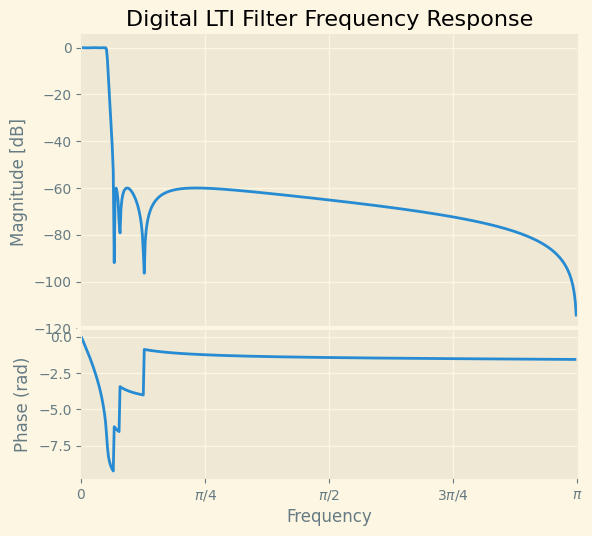

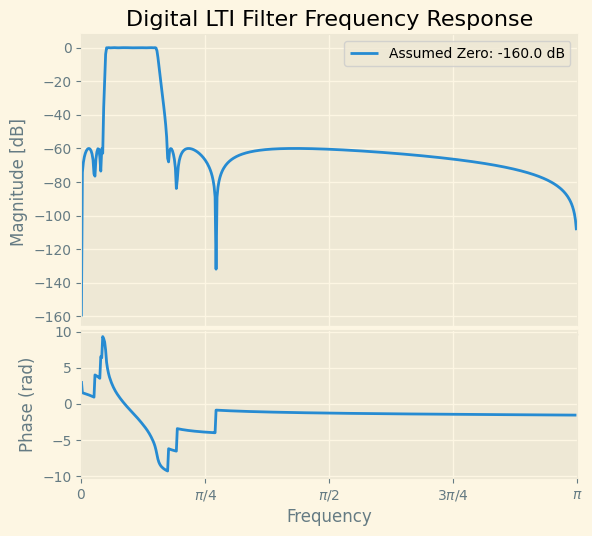

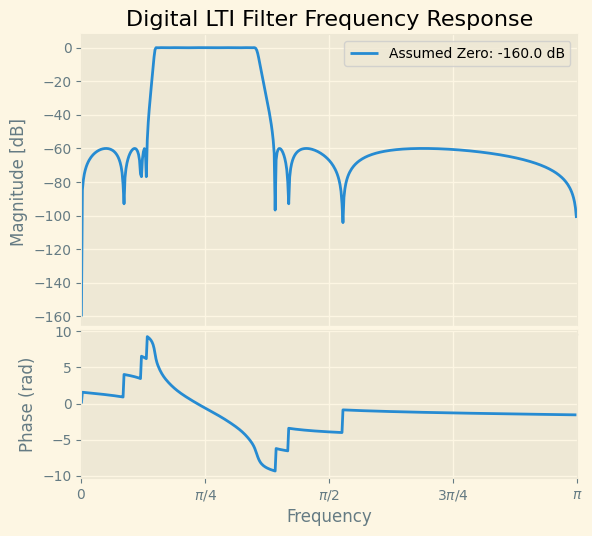

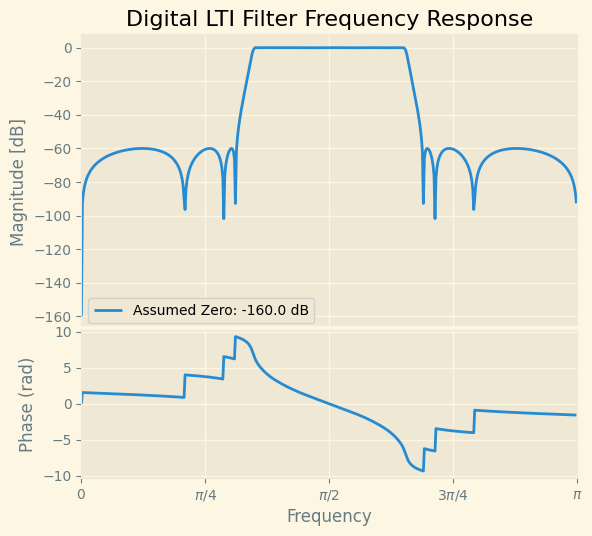

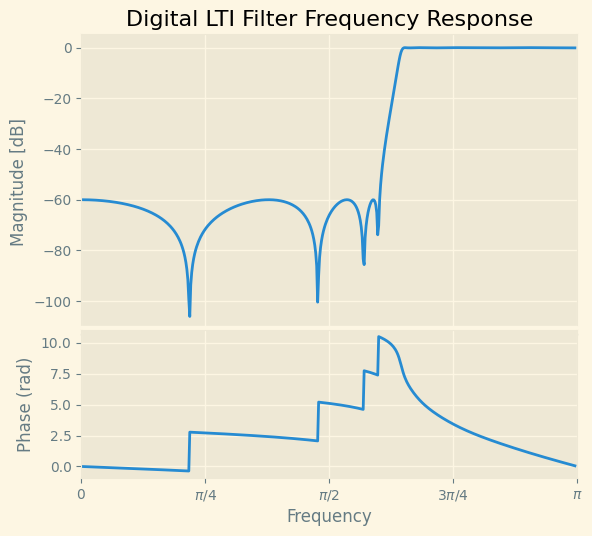

[8, 15, 15, 15, 9] 
 [8, 15, 15, 15, 9]


In [4]:
pass_freq_bands = [[.050], [.050, .150], [.15, .35], [.35, .65], [.65]]
stop_freq_bands = [[.075], [.025, .175], [.10, .40], [.30, .70], [.60]]

bank = []
num_of_numerator_coeffs_bands = []
num_of_denum_coeffs_bands = []

for pass_freqs, stop_freqs in zip(pass_freq_bands, stop_freq_bands):
    numerator_coeffs, denum_coeffs = signal.iirdesign(pass_freqs, stop_freqs, pass_loss_dB, stop_loss_dB)
    denum_coeffs = lti.correct_denum_coeffs(numerator_coeffs, denum_coeffs)
    num_of_numerator_coeffs_bands.append(len(numerator_coeffs))
    num_of_denum_coeffs_bands.append(len(denum_coeffs))
    lti.bode(numerator_coeffs, denum_coeffs)
    bank.append(signal.dlti(numerator_coeffs, denum_coeffs))

print(num_of_numerator_coeffs_bands, '\n', num_of_denum_coeffs_bands)

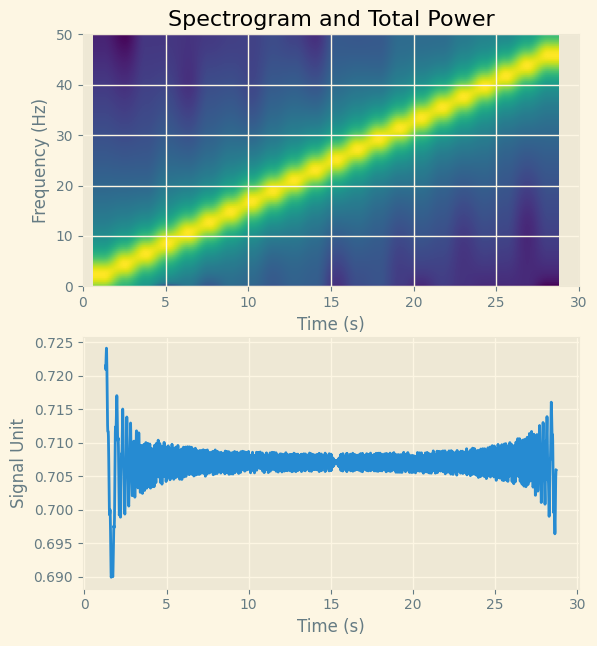

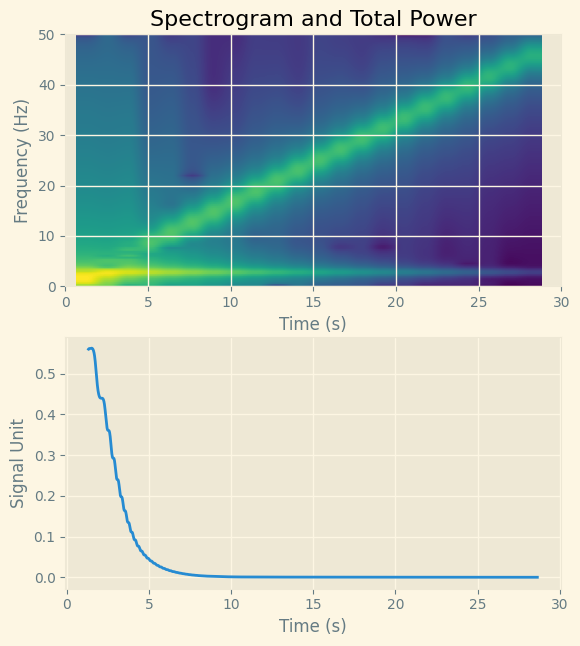

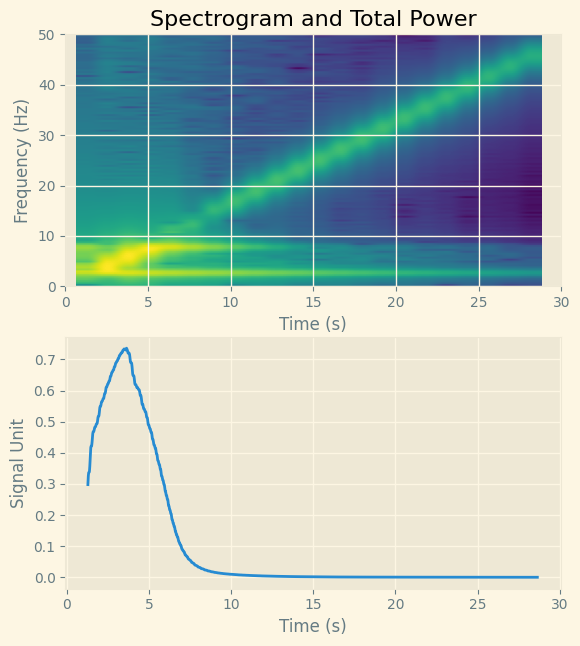

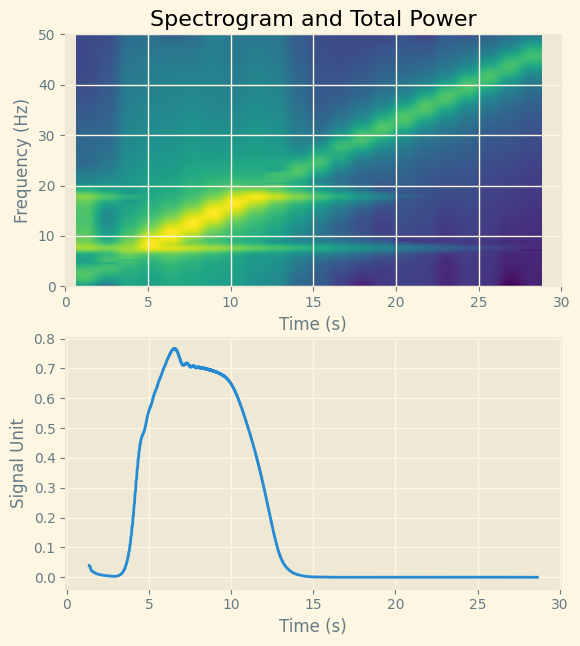

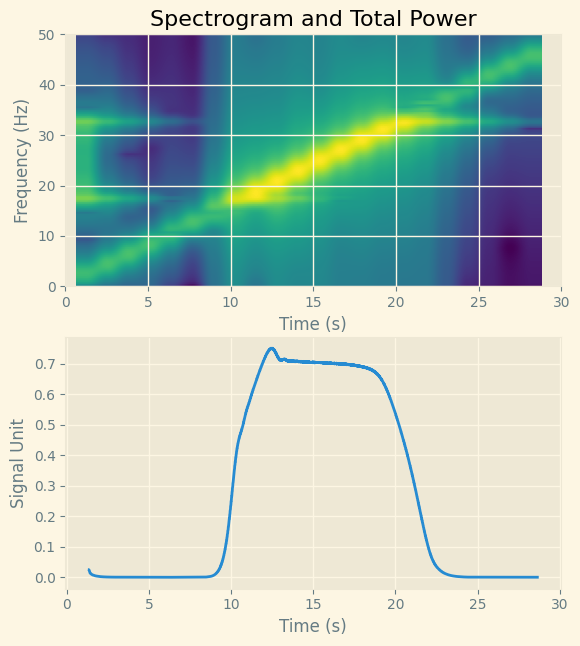

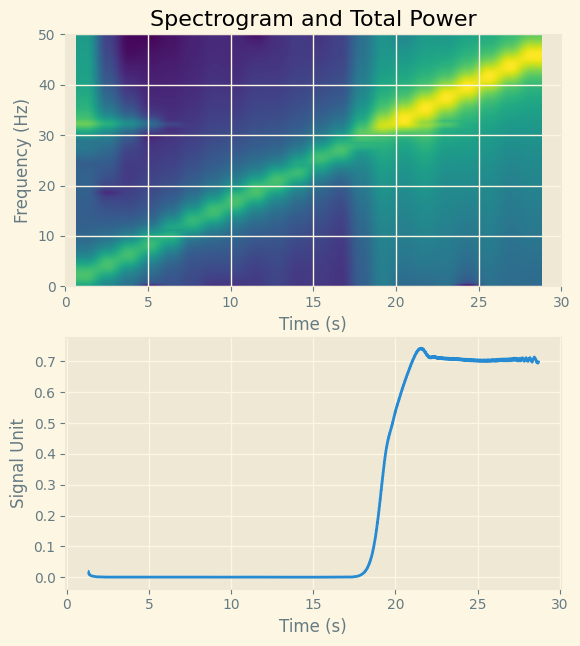

In [5]:
input_signal = input_signals[plot_spectrogram_and_power_idx]
fft.plot_spectrogram_and_power(time, input_signal, samp_freq)
for filter in bank:
    _, filtered_signal = signal.dlsim(filter, input_signal)
    fft.plot_spectrogram_and_power(time, filtered_signal.squeeze(), samp_freq)

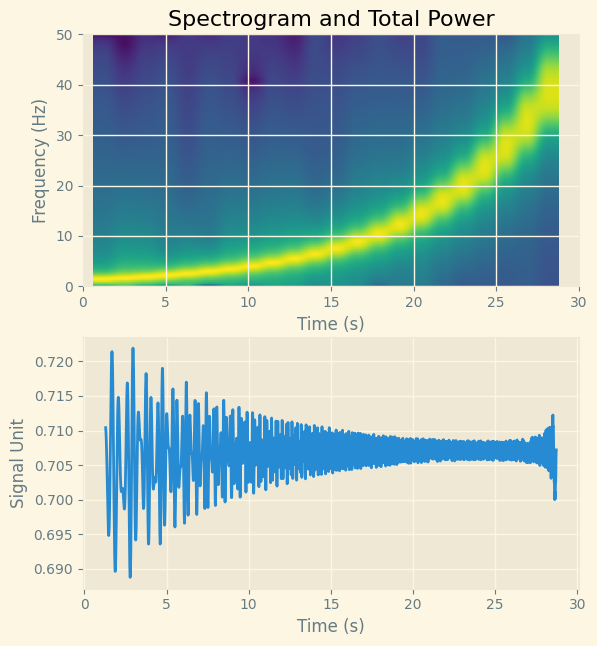

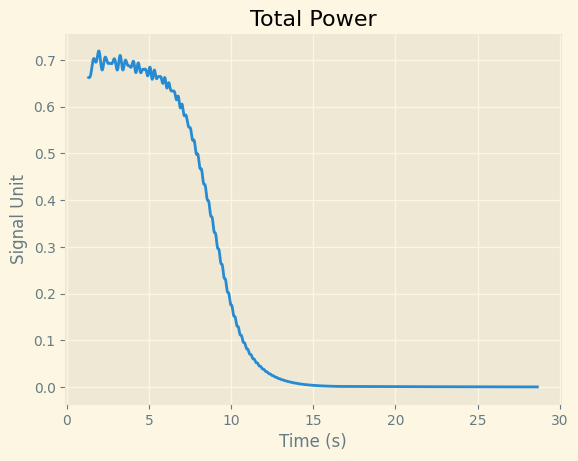

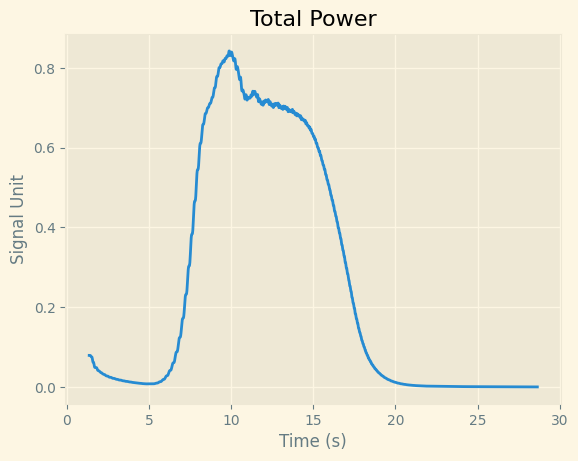

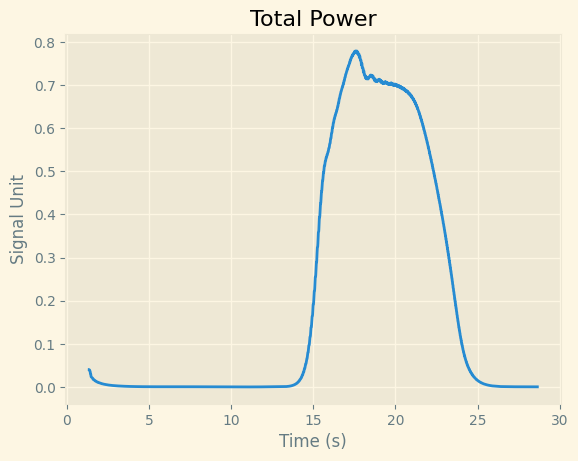

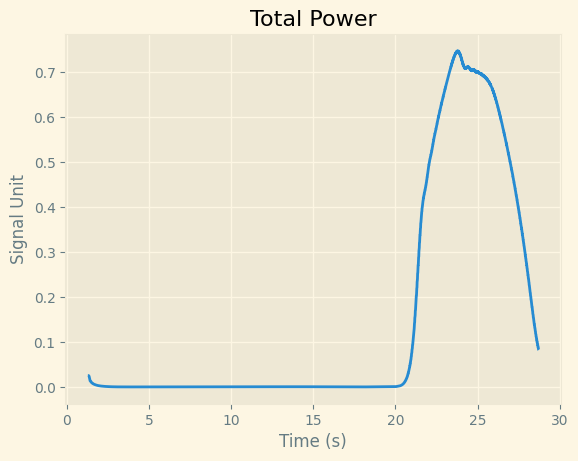

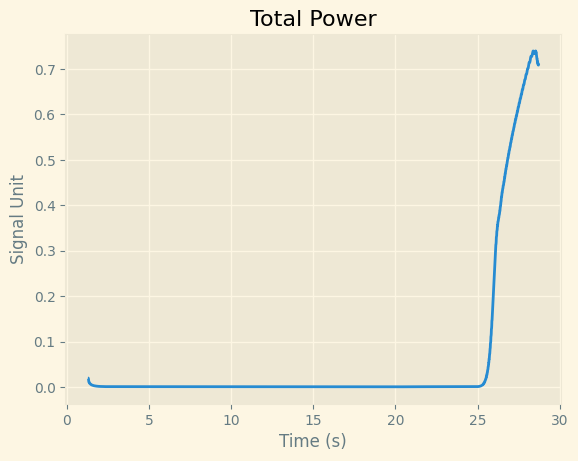

In [6]:
input_signal = input_signals[plot_total_power_only_idx]
fft.plot_spectrogram_and_power(time, input_signal, samp_freq)
for filter in bank:
    _, filtered_signal = signal.dlsim(filter, input_signal)
    fft.plot_total_power(time, filtered_signal.squeeze())

Next example: [/examples/lti_filters/phase_response.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/phase_response.ipynb)